In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
# sns.set()
# sns.set_style("white")
# sns.set_palette("GnBu_d")
%matplotlib inline

import folium
from folium import plugins
from folium.plugins import HeatMap
from datetime import datetime #for working with times objects
from datetime import timedelta #for working with times objects
import math
import random
from pathlib import Path

import geopy
from geopy.geocoders import GoogleV3
from geopy.distance import geodesic

In [2]:
read_once_df = pd.read_csv("../boston_2016_prep_cluster.csv")

In [3]:
df = read_once_df
df["start_time"] = pd.to_datetime(df["start_time"],format="%Y-%m-%d %H:%M:%S") # FORMAT %Y-%m-%d %H:%M:%S beachte - und :
df["end_time"] = pd.to_datetime(df["end_time"],format="%Y-%m-%d %H:%M:%S")

In [4]:
df['user_type'] = df['user_type'].replace(['Customer','Subscriber'],[0,1])
# user_type:
# 0 = Customer
# 1 = Subscriber

In [5]:
# df['weekday_start'] = df['weekday_start'].replace([0,1,2,3,4,5,6],[0,0,0,0,0,1,1])
# df['weekday_end'] = df['weekday_end'].replace([0,1,2,3,4,5,6],[0,0,0,0,0,1,1])
# 0 -> workday
# 1 -> weekend 

In [6]:
len(df)

1233600

In [7]:
df = df.drop(df[df.index % 2 == 0].index)
df = df.reset_index()
len(df)

616800

In [8]:
df = df.drop(df[df.index % 2 == 0].index)
df = df.reset_index()
len(df)

308400

In [9]:
df.drop(['level_0'], axis=1, inplace=True)
df = df.drop(df[df.index % 2 == 0].index)
df = df.reset_index()
len(df)

154200

In [10]:
df.drop(['level_0'], axis=1, inplace=True)
df = df.drop(df[df.index % 2 == 0].index)
df = df.reset_index()
len(df)

77100

In [11]:
df.drop(['level_0'], axis=1, inplace=True)
df = df.drop(df[df.index % 2 == 0].index)
df = df.reset_index()
len(df)

38550

In [12]:
df.drop(['level_0'], axis=1, inplace=True)
df = df.drop(df[df.index % 2 == 0].index)
df = df.reset_index()
len(df)

19275

In [13]:
df.drop(['level_0'], axis=1, inplace=True)
df = df.drop(df[df.index % 2 == 0].index)
df = df.reset_index()
len(df)

9637

In [14]:
df.head(50)

level_0  index  Unnamed: 0          start_time            end_time  \
0         1    127         129 2016-01-01 15:28:37 2016-01-01 15:44:28   
1         3    255         259 2016-01-02 08:31:36 2016-01-02 08:42:11   
2         5    383         388 2016-01-02 17:07:47 2016-01-02 17:20:49   
3         7    511         516 2016-01-03 11:42:55 2016-01-03 11:48:00   
4         9    639         644 2016-01-03 17:53:04 2016-01-03 18:03:13   
5        11    767         772 2016-01-04 10:11:05 2016-01-04 10:23:42   
6        13    895         901 2016-01-04 17:32:40 2016-01-04 17:40:29   
7        15   1023        1030 2016-01-05 09:11:13 2016-01-05 09:13:33   
8        17   1151        1158 2016-01-05 16:14:45 2016-01-05 16:20:01   
9        19   1279        1286 2016-01-05 20:53:40 2016-01-05 21:00:12   
10       21   1407        1415 2016-01-06 10:10:33 2016-01-06 10:15:25   
11       23   1535        1543 2016-01-06 16:27:53 2016-01-06 16:39:59   
12       25   1663        1672 2016-01-06 18:32:15 2016-01-06 18:37:34   
13       27   1791        1800 2016-01-07 07:37:59 2016-01-07 07:51:11   
14       29   1919        1928 2016-01-07 10:24:34 2016-01-07 10:29:01   
15       31   2047        2056 2016-01-07 14:46:17 2016-01-07 14:54:45   
16       33   2175        2186 2016-01-07 17:43:44 2016-01-07 17:53:18   
17       35   2303        2316 2016-01-08 06:31:23 2016-01-08 06:48:34   
18       37   2431        2445 2016-01-08 10:04:58 2016-01-08 10:20:29   
19       39   2559        2573 2016-01-08 14:39:45 2016-01-08 14:43:00   
20       41   2687        2701 2016-01-08 17:32:26 2016-01-08 17:42:36   
21       43   2815        2832 2016-01-08 22:02:31 2016-01-08 22:11:02   
22       45   2943        2960 2016-01-09 13:55:57 2016-01-09 14:07:47   
23       47   3071        3088 2016-01-09 18:44:56 2016-01-09 18:54:46   
24       49   3199        3216 2016-01-10 16:34:33 2016-01-10 16:49:45   
25       51   3327        3344 2016-01-11 08:24:59 2016-01-11 08:31:45   
26       53   3455        3472 2016-01-11 12:26:38 2016-01-11 12:42:16   
27       55   3583        3600 2016-01-11 17:12:27 2016-01-11 17:15:06   
28       57   3711        3728 2016-01-11 20:01:01 2016-01-11 20:03:39   
29       59   3839        3856 2016-01-12 08:38:29 2016-01-12 08:43:28   
30       61   3967        3984 2016-01-12 12:55:24 2016-01-12 13:01:25   
31       63   4095        4112 2016-01-12 17:03:51 2016-01-12 17:12:02   
32       65   4223        4240 2016-01-12 20:07:45 2016-01-12 20:15:28   
33       67   4351        4368 2016-01-13 09:14:13 2016-01-13 09:20:14   
34       69   4479        4496 2016-01-13 15:30:47 2016-01-13 15:40:01   
35       71   4607        4624 2016-01-13 19:15:33 2016-01-13 19:22:54   
36       73   4735        4753 2016-01-14 08:44:47 2016-01-14 08:51:25   
37       75   4863        4882 2016-01-14 12:58:40 2016-01-14 13:02:04   
38       77   4991        5011 2016-01-14 17:17:38 2016-01-14 17:29:41   
39       79   5119        5139 2016-01-14 21:00:22 2016-01-14 21:10:03   
40       81   5247        5268 2016-01-15 09:02:55 2016-01-15 09:07:44   
41       83   5375        5396 2016-01-15 13:31:41 2016-01-15 13:35:24   
42       85   5503        5524 2016-01-15 17:10:09 2016-01-15 17:14:13   
43       87   5631        5652 2016-01-15 20:45:30 2016-01-15 20:51:07   
44       89   5759        5780 2016-01-16 15:26:53 2016-01-16 15:33:15   
45       91   5887        5908 2016-01-16 20:31:38 2016-01-16 20:34:19   
46       93   6015        6037 2016-01-17 12:33:01 2016-01-17 12:38:15   
47       95   6143        6166 2016-01-17 17:32:48 2016-01-17 17:37:41   
48       97   6271        6294 2016-01-18 15:31:57 2016-01-18 15:38:52   
49       99   6399        6422 2016-01-19 06:31:55 2016-01-19 06:40:38   

    start_station_id  end_station_id  \
0                105             107   
1                143             107   
2                 84              68   
3                 95              90   
4                145         

In [15]:
df.drop(['index','level_0','Unnamed: 0','start_time','end_time','start_station_id','end_station_id','start_station_name','end_station_name','bike_id','start_coordinates','end_coordinates','weekday_end'], axis=1, inplace=True)

In [16]:
# df.drop(['Duration (Seconds)'], axis=1, inplace=True)

In [17]:
# df.drop(['Speed (km/h)'], axis=1, inplace=True)

In [18]:
# df.drop('start_hour', axis=1, inplace=True)

In [19]:
df.drop("user_type", axis=1, inplace=True)

In [20]:
# df.drop('weekday_start', axis=1, inplace=True) 

In [21]:
df.head(5)

Distance (KM)  Duration (Seconds)  Speed (km/h)  start_hour  \
0       2.193164               951.0      8.302200          15   
1       1.713520               635.0      9.714443           8   
2       2.203710               782.0     10.144955          17   
3       1.497483               305.0     17.675211          11   
4       2.201538               609.0     13.014019          17   

   start_distance_center  end_distance_center  weekday_start  
0               4.617206             2.500986              4  
1               1.441903             2.500986              5  
2               1.688254             3.751808              5  
3               3.310986             1.905842              6  
4               6.867309             4.944220              6

X -> df bei workshop

In [22]:
X = df

In [23]:
# X = df.drop("user_type", axis=1)
# y = df["user_type"]
# X.head()

In [24]:
# y.head()

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# create a df out of array
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled_df.head()

Distance (KM)  Duration (Seconds)  Speed (km/h)  start_hour  \
0       0.276486            0.052305     -0.297859    0.254831   
1      -0.115283           -0.219245      0.069059   -1.216215   
2       0.285100           -0.092923      0.180911    0.675130   
3      -0.291739           -0.502826      2.137362   -0.585767   
4       0.283326           -0.241588      0.926328    0.675130   

   start_distance_center  end_distance_center  weekday_start  
0               0.878449            -0.308013       0.636255  
1              -0.905351            -0.308013       1.163387  
2              -0.766958             0.392627       1.163387  
3               0.144649            -0.641379       1.690518  
4               2.142497             1.060548       1.690518

In [26]:
df_scaled = X_scaled_df
# df_scaled["user_type"] = df["user_type"]

In [27]:
# sns.pairplot(data=df_scaled, hue="user_type")

In [28]:
from sklearn.cluster import KMeans

In [29]:
k_max = 50  # We have 147 datapoints, more than 50 clusters are definitely not reasonable!

clusters = []
losses = []

for k in range(k_max):
    model = KMeans(n_clusters=k+1)
    model.fit(X_scaled)
    clusters.append(k+1)
    losses.append(model.inertia_)

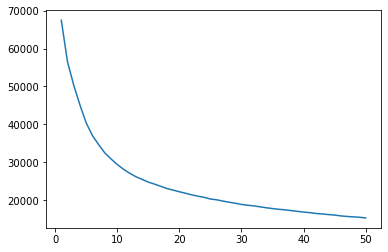

In [30]:
plt.plot(clusters, losses)
plt.show()

(0.0, 20.0)

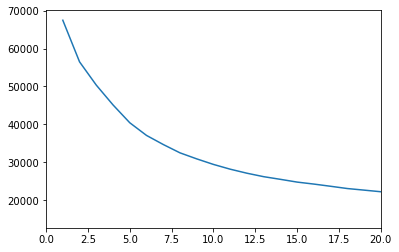

In [31]:
plt.plot(clusters, losses)
plt.xlim([0,20])

In [32]:
numbers = ["zero", "one", "two", "three","four","five","six"]

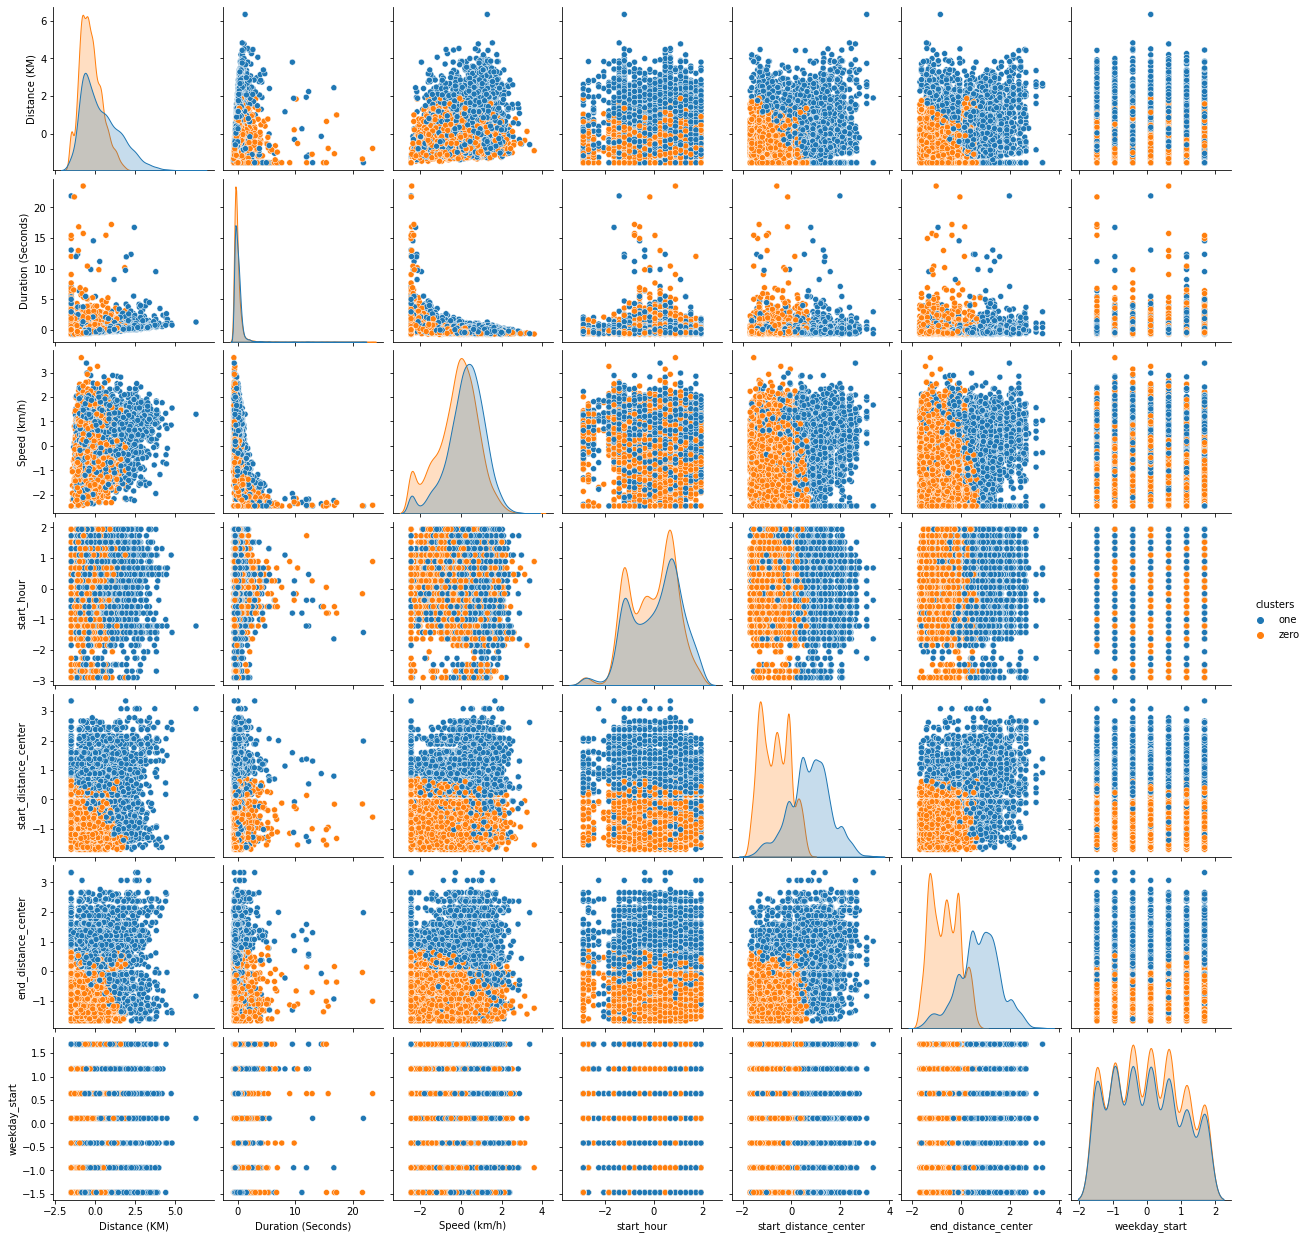

In [33]:
# refit algorithm
two_means = KMeans(n_clusters=2)
two_means.fit(X_scaled)

# match records to clusters by calling predict
# two_means.predict(X_scaled)

df_scaled["clusters"] = two_means.predict(X_scaled)
df_scaled["clusters"] = df_scaled["clusters"].apply(lambda x: numbers[x])
sns.pairplot(data=df_scaled, hue="clusters")

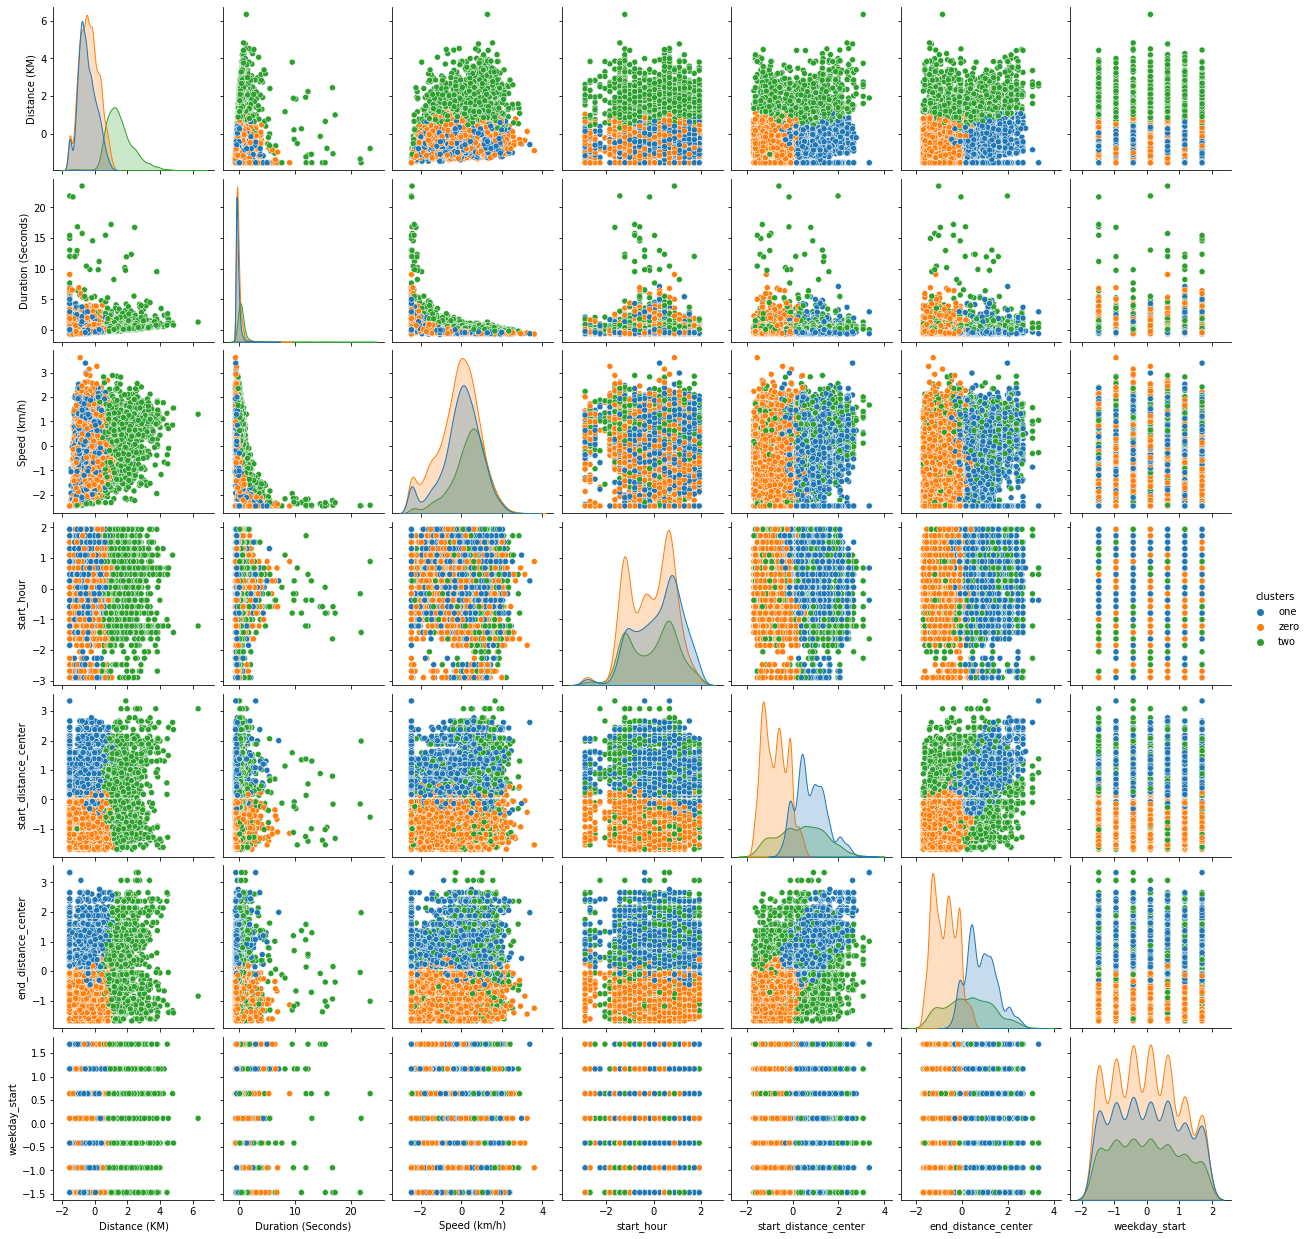

In [34]:
three_means = KMeans(n_clusters=3)
three_means.fit(X_scaled)
df_scaled["clusters"] = three_means.predict(X_scaled)
df_scaled["clusters"] = df_scaled["clusters"].apply(lambda x: numbers[x])
sns.pairplot(data=df_scaled, hue="clusters")

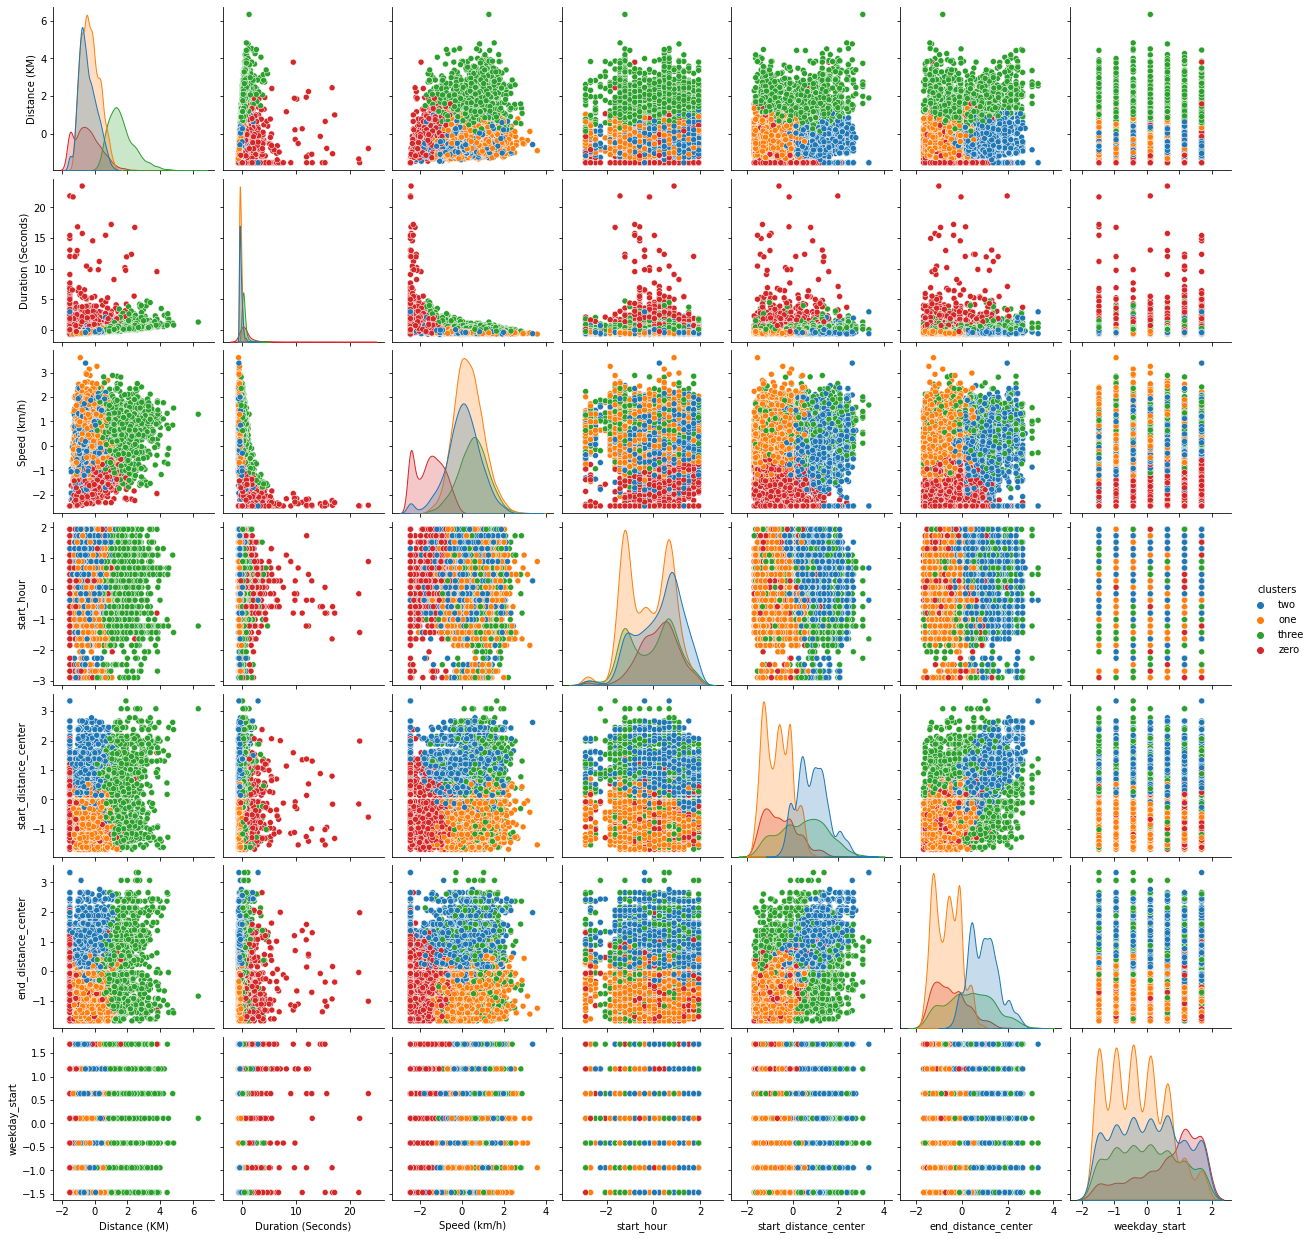

In [35]:
four_means = KMeans(n_clusters=4)
four_means.fit(X_scaled)
df_scaled["clusters"] = four_means.predict(X_scaled)
df_scaled["clusters"] = df_scaled["clusters"].apply(lambda x: numbers[x])
sns.pairplot(data=df_scaled, hue="clusters")

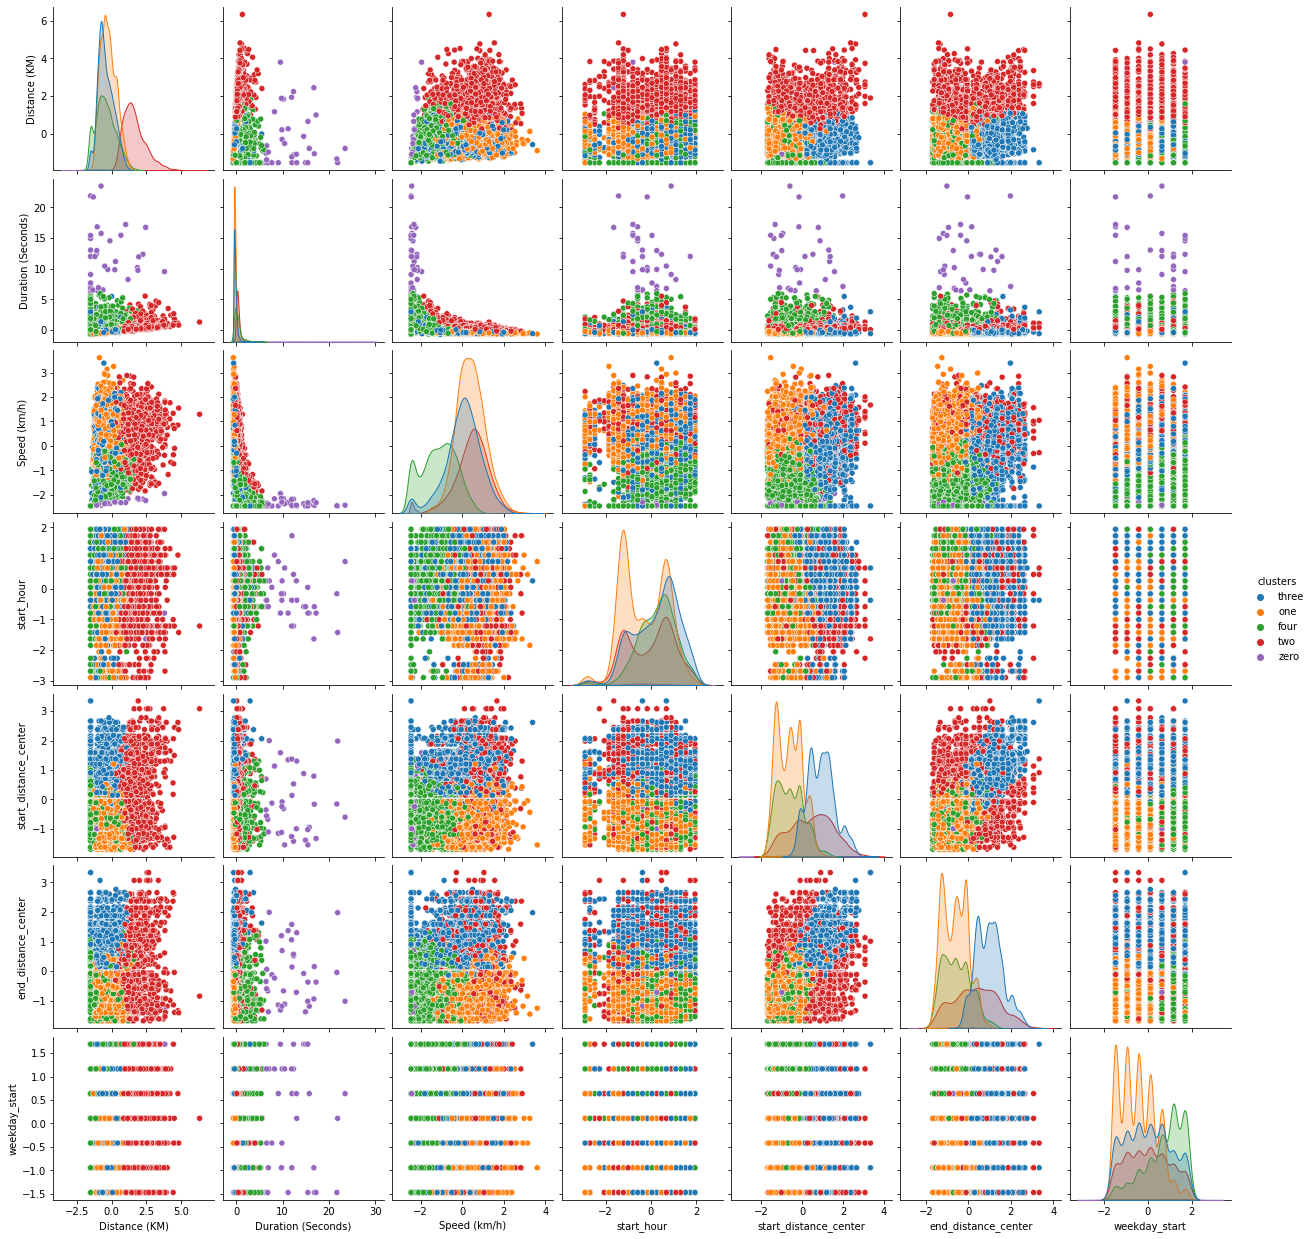

In [36]:
five_means = KMeans(n_clusters=5)
five_means.fit(X_scaled)
df_scaled["clusters"] = five_means.predict(X_scaled)
df_scaled["clusters"] = df_scaled["clusters"].apply(lambda x: numbers[x])
sns.pairplot(data=df_scaled, hue="clusters")

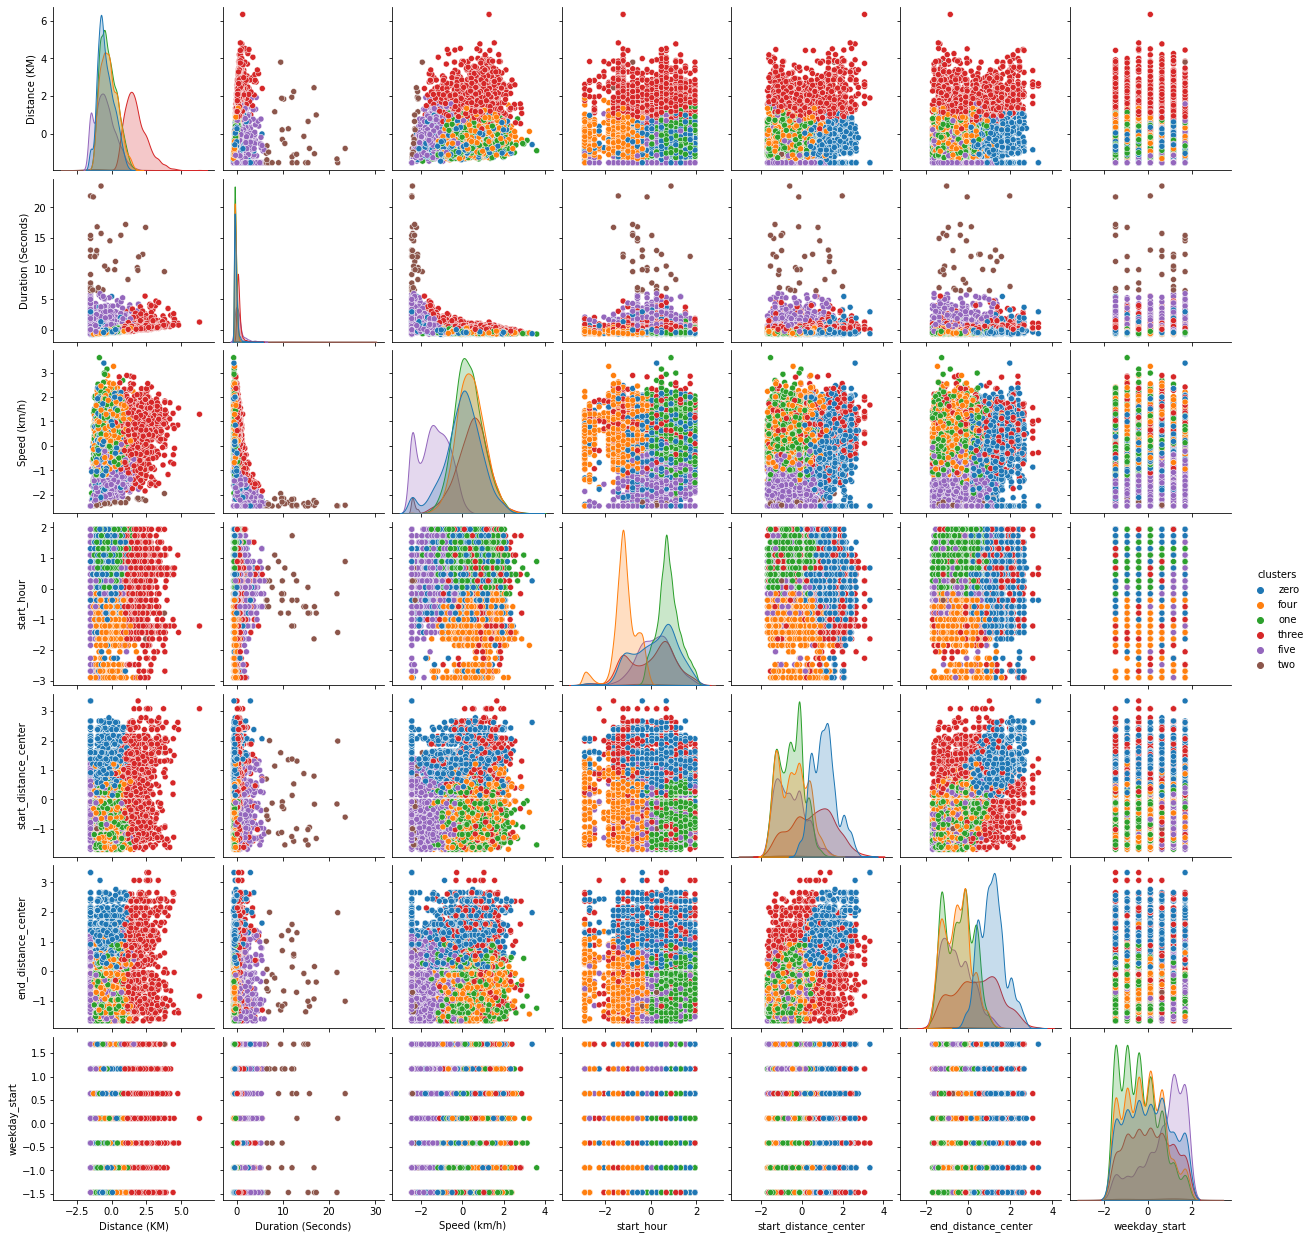

In [37]:
six_means = KMeans(n_clusters=6)
six_means.fit(X_scaled)
df_scaled["clusters"] = six_means.predict(X_scaled)
df_scaled["clusters"] = df_scaled["clusters"].apply(lambda x: numbers[x])
sns.pairplot(data=df_scaled, hue="clusters")

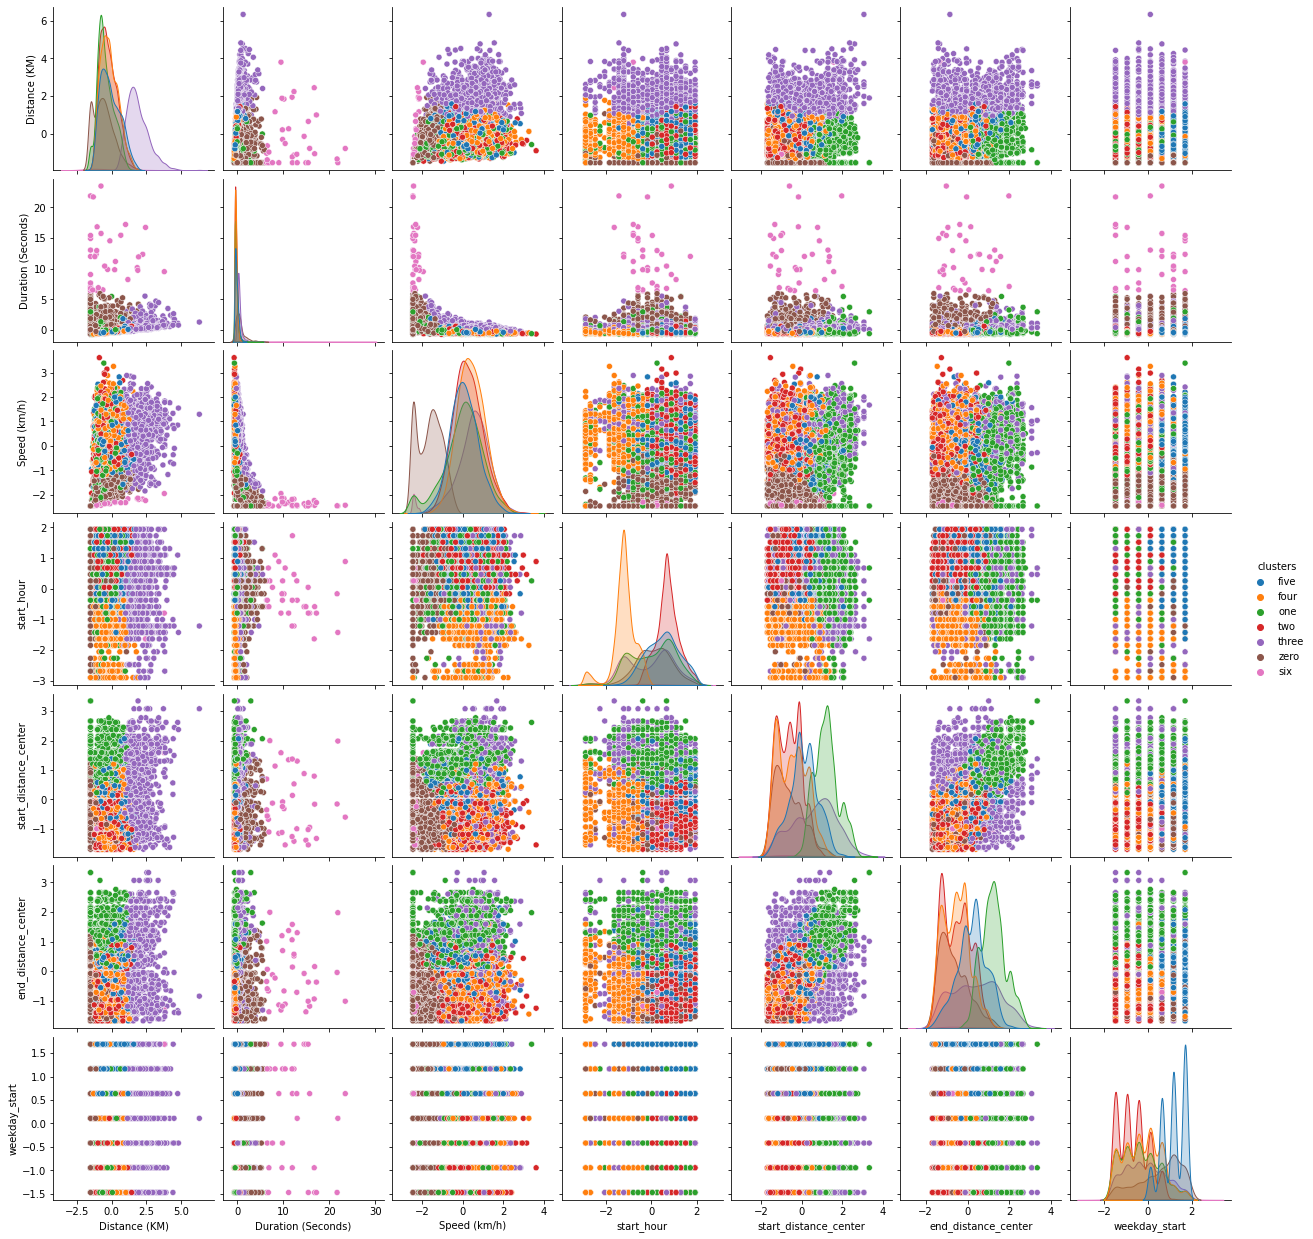

In [38]:
seven_means = KMeans(n_clusters=7)
seven_means.fit(X_scaled)
df_scaled["clusters"] = seven_means.predict(X_scaled)
df_scaled["clusters"] = df_scaled["clusters"].apply(lambda x: numbers[x])
sns.pairplot(data=df_scaled, hue="clusters")